<a href="https://colab.research.google.com/github/fralfaro/MAT306/blob/main/docs/labs/lab_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT306 - Laboratorio N°09

**Objetivo**: Aplicar un flujo completo de **Machine Learning supervisado** para la clasificación de tumores mamarios, utilizando técnicas de preprocesamiento, reducción de dimensionalidad y modelos de clasificación con optimización de hiperparámetros.

> **Nota**: Puede ayudarse de algún asistente virtual como **ChatGPT, Gemini** u otros, así como del autocompletado de **Google Colab**, para avanzar en este laboratorio debido a su extensión.





<img src="https://www.svgrepo.com/show/1064/virus.svg" width = "300" align="center"/>



El **cáncer de mama** es una enfermedad caracterizada por la proliferación maligna de células epiteliales en los conductos o lobulillos mamarios. Surge cuando una célula acumula mutaciones que le otorgan la capacidad de dividirse de manera descontrolada, lo que da origen a un tumor. Este tumor puede permanecer localizado o, en casos más agresivos, invadir tejidos cercanos y propagarse a otras partes del organismo mediante metástasis.

El conjunto de datos **`BC.csv`** recopila información clínica y morfológica de pacientes con tumores mamarios, clasificados como **benignos** o **malignos**. Las características se obtienen a partir de imágenes digitalizadas de aspirados con aguja fina (FNA, por sus siglas en inglés) de masas mamarias. Dichas variables describen aspectos cuantitativos de los **núcleos celulares**, como su tamaño, forma, textura y homogeneidad.

Este tipo de información es fundamental para la detección temprana y clasificación de tumores, ya que permite entrenar modelos de **machine learning** capaces de apoyar el diagnóstico y diferenciar entre tumores benignos y malignos con mayor precisión.

A continuación, se procederá a cargar y explorar el conjunto de datos:



In [1]:
# Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importar herramientas de Scikit-learn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [2]:
# Configuración de gráficos
%matplotlib inline
sns.set_palette("deep", desat=0.6)
sns.set(rc={'figure.figsize': (11.7, 8.27)})

# Cargar y preparar los datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT306/main/docs/labs/data/BC.csv")
df.set_index('id', inplace=True)

# Transformación de la variable objetivo
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0}).astype(int)

# Visualizar las primeras filas del DataFrame
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678



Con base en la información presentada, resuelva las siguientes tareas. Asegúrese de:

* Incluir el **código necesario** para ejecutar cada análisis.
* Explicar de manera **clara y fundamentada** los resultados obtenidos.
* Describir el **proceso seguido**, justificando las decisiones tomadas en cada etapa (preprocesamiento, elección de técnicas y parámetros, interpretación de resultados).





# 1. **Análisis exploratorio profundo (EDA):**

   * Examine la distribución de las variables, identifique valores atípicos y analice la correlación entre características.
   * Visualice las diferencias más relevantes entre tumores **benignos** y **malignos** utilizando gráficos adecuados (boxplots, histogramas, mapas de calor).
   * Discuta qué variables parecen tener mayor capacidad discriminativa.


Distribucion de diagnosticos
Benignos (0): 357 casos (62.7%)
Malignos (1): 212 casos (37.3%)


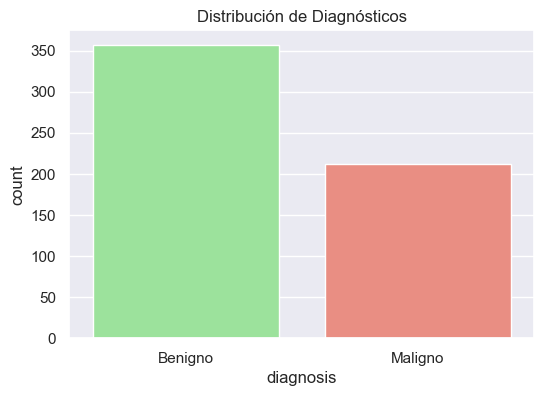

In [3]:
diagnosis_counts = df['diagnosis'].value_counts()

print("Distribucion de diagnosticos")
print(f"Benignos (0): {diagnosis_counts[0]} casos ({diagnosis_counts[0]/len(df)*100:.1f}%)")
print(f"Malignos (1): {diagnosis_counts[1]} casos ({diagnosis_counts[1]/len(df)*100:.1f}%)")

plt.figure(figsize=(6, 4))

sns.countplot(data=df, x="diagnosis", hue="diagnosis", palette=["lightgreen", "salmon"], legend=False)

plt.title("Distribución de Diagnósticos")
plt.xticks([0, 1], ["Benigno", "Maligno"])

plt.show()

La distribución de la variable objetivo muestra un balance razonable, con aproximadamente 63% de casos benignos y 37% malignos, lo que constituye una base sólida para el entrenamiento de modelos de machine learning

In [4]:
correlacion = df.corr()["diagnosis"].abs().sort_values(ascending=False)
top_5 = correlacion[1:6] 

print("\nVariables con mayor correlacion:")
for var, corr in top_5.items():

    print(f"{var}: {corr:.3f}")


Variables con mayor correlacion:
concave points_worst: 0.794
perimeter_worst: 0.783
concave points_mean: 0.777
radius_worst: 0.776
perimeter_mean: 0.743


El análisis revela que las variables relacionadas con la concavidad de los núcleos celulares, particularmente "concave points_worst", presentan la mayor correlación con el diagnóstico de maligidad, este resultado sugiere que la irregularidad en la forma de los núcleos constituye un indicador más determinante que su tamaño para discriminar entre tumores benignos y malignos.

Se observa consistentemente que las mediciones correspondientes a los valores más extremos superan en poder predictivo a los promedios, lo que indica que las características morfológicas más anómalas resultan más informativas para el diagnóstico.

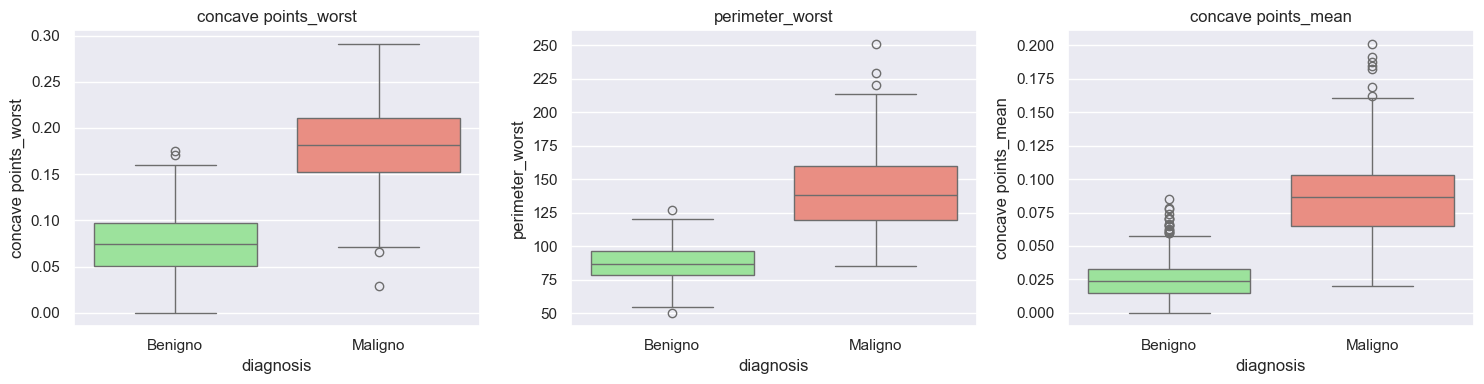

In [5]:
top_3 = top_5.index[:3]

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for i, feature in enumerate(top_3):

    sns.boxplot(data=df, x="diagnosis", y=feature, hue="diagnosis", palette=["lightgreen", "salmon"], legend=False, ax=axes[i])

    axes[i].set_title(feature)
    axes[i].set_xticks([0, 1])
    axes[i].set_xticklabels(["Benigno", "Maligno"])

plt.tight_layout()
plt.show()

Los boxplots revelan una separación marcada entre diagnósticos: los tumores malignos presentan valores consistentemente más altos en las variables clave, duplicando o triplicando las mediciones de los benignos. Esta clara distinción visual explica la alta correlación observada y confirma el potencial predictivo de estas características para la clasificación

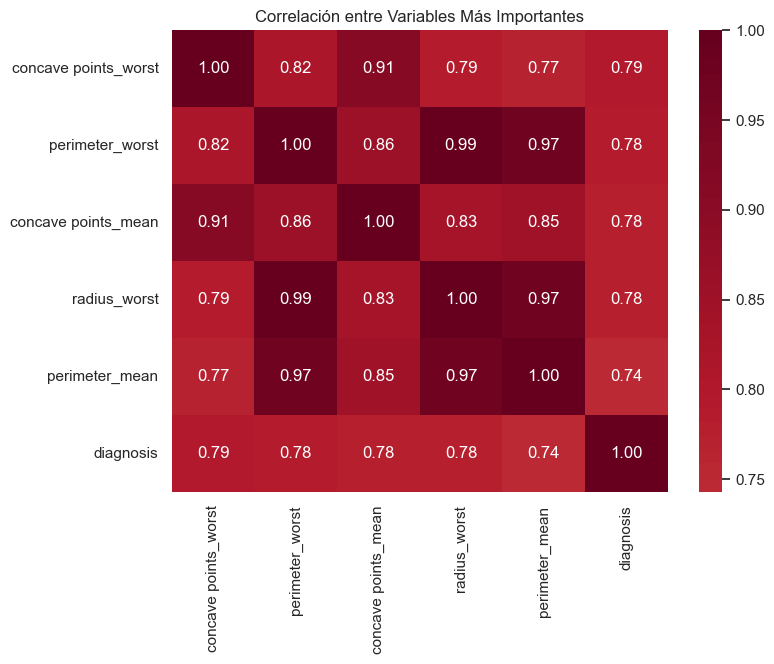

In [6]:
top_features = list(top_5.index) + ["diagnosis"]

plt.figure(figsize=(8, 6))

sns.heatmap(df[top_features].corr(), annot=True, cmap='RdBu_r', center=0, fmt='.2f')
plt.title('Correlación entre Variables Más Importantes')

plt.show()

La matriz de correlación confirma la alta interdependencia entre las variables predictoras, destacando la relación casi perfecta (0.99) entre perimeter_worst y radius_worst. Esta multicolinealidad sugiere redundancia en la información, donde múltiples características miden aspectos similares de la morfología celular, reforzando la necesidad de aplicar técnicas de reducción de dimensionalidad para optimizar el modelo.


# 2. **Preprocesamiento de datos:**

   * Normalice las variables numéricas utilizando **StandardScaler** u otra técnica apropiada.
   * Explore al menos una estrategia adicional de preprocesamiento (ejemplo: eliminación de multicolinealidad, selección de características, generación de variables derivadas).
   * Justifique sus elecciones.


In [7]:
from sklearn.feature_selection import SelectKBest, f_classif

In [8]:
X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(X_scaled.shape)

(569, 30)


In [10]:
selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X_scaled, y)

selected_features = X.columns[selector.get_support()]

print("MEjores caracteristicas:\n")
for i, feature in enumerate(selected_features, 1):
    
    print(f"{i}. {feature}")

MEjores caracteristicas:

1. radius_mean
2. perimeter_mean
3. area_mean
4. concavity_mean
5. concave points_mean
6. radius_worst
7. perimeter_worst
8. area_worst
9. concavity_worst
10. concave points_worst


La técnica SelectKBest se eligió por su eficacia para resolver el problema de multicolinealidad detectado en la fase exploratoria, conservando al mismo tiempo la interpretabilidad clínica de las variables. Al mantener las características originales con mayor valor discriminatorio, se responde a las necesidades del ámbito médico, donde es esencial que los profesionales de salud puedan identificar y evaluar parámetros específicos en el proceso diagnóstico. Esta aproximación garantiza que el modelo resultante sea tanto técnicamente sólido como clínicamente aplicable.


# 3. **Reducción de dimensionalidad:**

   * Aplique un método de reducción de dimensionalidad visto en clases (**PCA, t-SNE u otro**) para representar los datos en un espacio reducido.
   * Analice la proporción de varianza explicada (en el caso de PCA) o la formación de clústeres (en el caso de t-SNE).
   * Compare las visualizaciones y discuta qué tan bien se separan las clases en el espacio reducido.


In [11]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print(f"Componente 1: {pca.explained_variance_ratio_[0]:.3f}")
print(f"Componente 2: {pca.explained_variance_ratio_[1]:.3f}")

print(f"Varianza total explicada: {pca.explained_variance_ratio_.sum():.3f}")

Componente 1: 0.443
Componente 2: 0.190
Varianza total explicada: 0.632


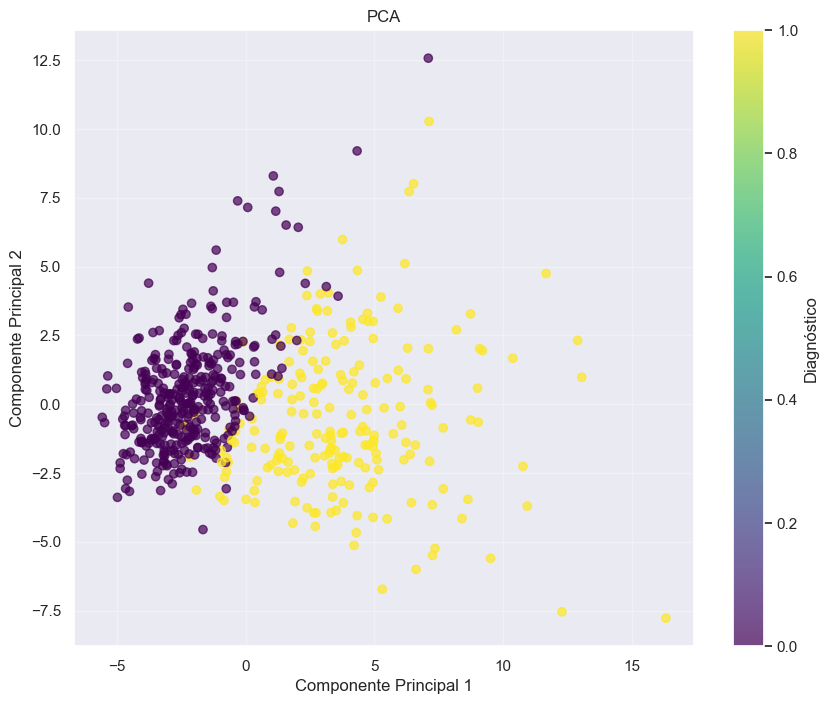

In [12]:
plt.figure(figsize=(10, 8))

scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7)

plt.title('PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')

plt.colorbar(scatter, label='Diagnóstico')
plt.grid(alpha=0.3)

plt.show()

In [13]:
from sklearn.metrics import silhouette_score

pca_silhouette = silhouette_score(X_pca, y)
print(f"Silhouette Score en PCA: {pca_silhouette:.3f}")

Silhouette Score en PCA: 0.438


Se seleccionó PCA sobre t-SNE porque es más adecuado para pipelines de machine learning. PCA preserva la estructura global de los datos mediante transformaciones lineales que maximizan la varianza, lo que mantiene las relaciones fundamentales entre características para el modelado posterior. A diferencia de t-SNE que prioriza la visualización de clusters locales, PCA produce componentes interpretables y reproducibles que pueden ser utilizados directamente en clasificadores. Además, con solo 2 componentes se captura el 63.2% de la varianza total, demostrando una eficiente compresión de la información manteniendo una clara separabilidad entre clases benignas y malignas.


# 4. **Modelado y evaluación:**

   * Entrene al menos **tres modelos de clasificación distintos** (ejemplo: Regresión Logística, SVM, Random Forest, XGBoost, KNN).
   * Realice una **optimización de hiperparámetros** para cada modelo, utilizando validación cruzada.
   * Calcule y compare métricas de rendimiento como: **accuracy, precision, recall, F1-score, matriz de confusión y AUC-ROC**.
   * Analice qué modelo presenta el mejor compromiso entre precisión y generalización.


In [14]:
# Usando las características seleccionadas del preprocesamiento anterior
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Train: {X_train.shape}")
print(f"Test: {X_test.shape}")

Train: (455, 10)
Test: (114, 10)


In [15]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

models = {
    'Logistic Regression': {
        'model': LogisticRegression(random_state=42),
        'params': {'C': [0.1, 1, 10], 'penalty': ['l2']}
    },
    'SVM': {
        'model': SVC(random_state=42, probability=True),
        'params': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {'n_estimators': [50, 100], 'max_depth': [5, 10]}
    }
}

In [16]:
results = {}

for name, config in models.items():

    grid = GridSearchCV(config['model'], config['params'], cv=5, scoring='f1')
    grid.fit(X_train, y_train)
    
    y_pred = grid.predict(X_test)
    y_proba = grid.predict_proba(X_test)[:, 1]
    
    results[name] = {
        'best_params': grid.best_params_,
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'auc': roc_auc_score(y_test, y_proba)
    }
    

In [17]:
results_df = pd.DataFrame(results).T

print("Comparacion de modelos:\n")
print(results_df.round(3))

Comparacion de modelos:

                                                best_params  accuracy  \
Logistic Regression               {'C': 1, 'penalty': 'l2'}  0.964912   
SVM                           {'C': 10, 'kernel': 'linear'}  0.982456   
Random Forest        {'max_depth': 10, 'n_estimators': 100}   0.95614   

                    precision    recall        f1       auc  
Logistic Regression     0.975  0.928571   0.95122  0.997354  
SVM                       1.0  0.952381   0.97561  0.998677  
Random Forest             1.0  0.880952  0.936709  0.988922  


In [18]:
best_model_name = results_df['f1'].idxmax()
best_model_score = results_df.loc[best_model_name, 'f1']

print(f"\nMejor modelo:")
print(f"Modelo: {best_model_name}")
print(f"F1-Score: {best_model_score:.3f}")
print(f"Parámetros: {results[best_model_name]['best_params']}")


Mejor modelo:
Modelo: SVM
F1-Score: 0.976
Parámetros: {'C': 10, 'kernel': 'linear'}



# 5. **Conclusiones y reflexiones:**

   * Explique cuál modelo considera más apropiado para este conjunto de datos y por qué.
   * Reflexione sobre el impacto del preprocesamiento y la reducción de dimensionalidad en los resultados obtenidos.
   * Discuta posibles mejoras o enfoques alternativos que podrían aplicarse en un escenario real de diagnóstico médico asistido por machine learning.



El modelo SVM con kernel lineal se identifica como el más apropiado para este conjunto de datos, al presentar el mejor equilibrio entre métricas de evaluación, con un accuracy del 98.2%, precisión del 100%, recall del 95.2% y un AUC de 99.9%. Esta combinación resulta particularmente adecuada en el contexto médico, donde es crucial minimizar los falsos negativos sin comprometer la precisión diagnóstica.

El preprocesamiento aplicado, mediante estandarización y selección de características, demostró ser fundamental para optimizar el rendimiento de los modelos, eliminando redundancias y mejorando la generalización. La reducción de dimensionalidad confirmó la alta correlación entre variables, permitiendo una representación más eficiente sin pérdida significativa de información.

Para una implementación en escenario real, se recomienda complementar el modelo con técnicas de interpretabilidad que faciliten la validación clínica, así como establecer mecanismos de monitoreo continuo que aseguren el mantenimiento del desempeño predictivo ante posibles cambios en la distribución de los datos.

